## Try some Keras LSTM bidirectional

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn import model_selection
import numpy as np

In [2]:
import tensorflow  as tf

/Users/ChrisD/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import keras

Using TensorFlow backend.


In [5]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb


max_features = 20000
# cut texts after this number of words
# (among top max_features most common words)

maxlen = 100
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=[x_test, y_test])

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 208s 8ms/step - loss: 0.4150 - acc: 0.8099 - val_loss: 0.3889 - val_acc: 0.8359


In [6]:
model.save('test_model.h5')  # creates a HDF5 file 'my_model.h5'

In [4]:
import h5py
from keras.models import load_model

In [18]:
model.metrics_names

['loss', 'acc']

NameError: name 'mean_pred' is not defined

## Load our test data

In [ ]:
# load training data from csv

In [14]:
!ls 

LSTM_cd.ipynb              submission_logreg.csv
README.md                  test.csv
__pycache__                toxic_comments.ipynb
linear_regression_cd.ipynb train.csv


In [13]:
train_all=pd.read_csv('train.csv')

In [36]:
train_all.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [27]:
train_all[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

Notice how few threats compared to toxic or obscene, severe_toxic ~= identity hate


Below: count of other flags raised for all threat comments

In [18]:
train_all[train_all['threat']==1][['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum()

toxic            449
severe_toxic     112
obscene          301
threat           478
insult           307
identity_hate     98
dtype: int64

In [19]:
from sklearn import model_selection
train_80, test_20 = model_selection.train_test_split(train_all,test_size=0.2)

In [20]:
train_80, test_20 = model_selection.train_test_split(train_all,test_size=0.2)

In [24]:
t80threats=train_80[train_80['threat']==1][['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum()

In [25]:
t20threats=test_20[test_20['threat']==1][['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum()

In [26]:
t80threats/t20threats

toxic            3.880435
severe_toxic     4.333333
obscene          3.426471
threat           3.927835
insult           3.385714
identity_hate    3.454545
dtype: float64

So train and test subsamples have an approximately equal proportion of co-flags

In [29]:
train_80[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum()/ \
test_20[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum()

toxic            3.935140
severe_toxic     3.862805
obscene          4.035161
threat           3.927835
insult           3.910848
identity_hate    3.795222
dtype: float64

Ratio of flags in general are between 3.80 and 4.04, so pretty even split of flags (though not necessarily an even split of comments with equivalent multi-category flags)

In [48]:
maxlen=0.0
for index, row in train_all.iterrows():
    L=len(row['comment_text'])
    if L > maxlen:
        maxlen=L


max comment length in training set is 5000


In [49]:
print('max comment char length in training set is {}'.format(maxlen))

max comment char length in training set is 5000


In [50]:
maxwords=0.0
for index, row in train_all.iterrows():
    L=len(row['comment_text'].split(' '))
    if L > maxwords:
        maxwords=L

In [51]:
print('max comment WORD COUNT (based on ' ' split) in training set is {}'.format(maxwords))

max comment WORD COUNT (based on  split) in training set is 2273


In [5]:
#imports:

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [55]:
#preprocessing

max_features = 5000
# cut texts after this number of words, since character max is 5000, word max also has this ceiling

print('Loading data...')

#training data
x_train = train_80['comment_text']
y_train = train_80[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

#testing validation data (not for training model, just validation for )

x_test = test_20['comment_text']
y_test = test_20[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

Loading data...
127656 train sequences
31915 test sequences


In [60]:
#Tokenize comment_text
Tokenizer= keras.preprocessing.text.Tokenizer(num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True, split=' ', char_level=False, oov_token=None)

Tokenizer.fit_on_texts(train_all)
x_train=Tokenizer.texts_to_sequences(x_train)
x_test=Tokenizer.texts_to_sequences(x_test)

In [4]:
# parameters
num_classes = 6
batch_size = 50
maxlen = 2300   # longest comment in words split(' ')



print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()  #Sequential model for LSTM

#
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64,activation='relu',recurrent_activation='hard_sigmoid')))  #relu for activation, hard sigmoid bc fast and reliable
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[x_test, y_test])

Pad sequences (samples x time)


NameError: name 'sequence' is not defined

## Package into single .py file

In [3]:
%%writefile bidirectional_lstm_reluHiSig_softmax_toxic_test.py
#!~/anaconda3/bin/python
# -*- coding: utf-8 -*-

import pandas as pd
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn import model_selection
import numpy as np
import tensorflow  as tf
import keras
import h5py
from keras.models import load_model

#imports:

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

#sys_argvs
FILE=sys.argv[1]  # file path
num_classes = 6
batch_size = int(sys.argv[2]) # try with 32
maxlen = int(sys.argv[3])   # longest comment in words split(' ') is 2300, vast majority under 300
max_features = 5000 # cut texts after this number of words, since character max is 5000, word max also has this ceiling
EPOCHS=int(sys.argv[4])

# import data
print('Importing data...')
train_all=pd.read_csv(FILE)

train_80, test_20 = model_selection.train_test_split(train_all,test_size=0.2)

#preprocessing

print('Splitting data...')

#training data
x_train = train_80['comment_text']
y_train = train_80[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

#testing validation data (not for training model, just validation for )

x_test = test_20['comment_text']
y_test = test_20[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

# check lengths

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

#Tokenize comment_text
print('tokenizing')
#top 10000 words, all lowercase
Tokenizer= keras.preprocessing.text.Tokenizer(num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True, split=' ', char_level=False, oov_token=None)

Tokenizer.fit_on_texts(train_all)
x_train=Tokenizer.texts_to_sequences(x_train)
x_test=Tokenizer.texts_to_sequences(x_test)


print('Padding sequences')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

#check shape
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64,activation='relu',recurrent_activation='hard_sigmoid')))  #relu for activation, hard sigmoid bc fast and reliable
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Training...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=EPOCHS,
          validation_data=[x_test, y_test])

model.save('bidirectional_lstm_reluHiSig_softmax_{}batch_{}epochs.h5'.format(batch_size,EPOCHS))

Overwriting bidirectional_lstm_reluHiSig_softmax_toxic_test.py


In [ ]:
!python bidirectional_lstm_reluHiSig_softmax_toxic_test.py train.csv 50 300 2

/Users/ChrisD/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
Importing data...
Splitting data...
127656 train sequences
31915 test sequences
tokenizing
Padding sequences
x_train shape: (127656, 300)
x_test shape: (31915, 300)
Training...
Train on 127656 samples, validate on 31915 samples
Epoch 1/2
2018-04-15 13:16:14.278980: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
 18850/127656 [===>..........................] - ETA: 29:46 - loss: 0.2343 - acc: 0.9614

In [23]:
%%writefile get_test_data.py
#!~/anaconda3/bin/python
# -*- coding: utf-8 -*-

!wget('https://s3.amazonaws.com/danicic-w266-final/train.csv')

print('USE: !python bidirectional_lstm__reluHiSig_softmax_toxic_test.py train.csv <batch size> <maxlength> <epochs>')

Overwriting get_test_data.py


In [15]:
comment_lengths=list()

for index, row in train_all.iterrows():
    comment_lengths.append(len(row['comment_text'].split(' ')))

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

(array([1.35546e+05, 1.59010e+04, 4.19700e+03, 1.45100e+03, 8.35000e+02,
        6.97000e+02, 5.81000e+02, 2.85000e+02, 3.70000e+01, 1.40000e+01,
        1.60000e+01, 3.00000e+00, 4.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.0000e+00, 1.1460e+02, 2.2820e+02, 3.4180e+02, 4.5540e+02,
        5.6900e+02, 6.8260e+02, 7.9620e+02, 9.0980e+02, 1.0234e+03,
        1.1370e+03, 1.2506e+03, 1.3642e+03, 1.4778e+03, 1.5914e+03,
        1.7050e+03, 1.8186e+03, 1.9322e+03, 2.0458e+03, 2.1594e+03,
        2.2730e+03]),
 <a list of 20 Patch objects>)

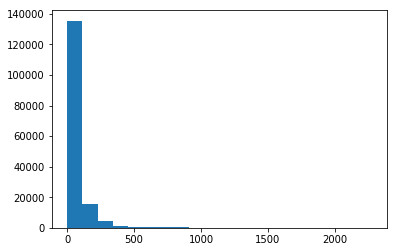

In [18]:
plt.hist(comment_lengths, bins=20)

In [22]:
len([i for i in comment_lengths if i <301])/len(comment_lengths)

0.9695120040608882